# **Travel-Insurance-Prediction**
> Travel Insurance Prediction Data

> A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.
The New Insurance Package Also Includes Covid Cover.
The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.
The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.
The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters Given Below.

> Reference: https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data

> Features

* [Age] : Age Of The Customer
* [Employment Type] : The Sector In Which Customer Is Employed
* [GraduateOrNot] : Whether The Customer Is College Graduate Or Not
* [AnnualIncome] : The Yearly Income Of The Customer In Indian Rupees (Rounded To Nearest 50 Thousand Rupees)
* [FamilyMembers] : Number Of Members In Customer's Family
* [ChronicDisease] : Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* [FrequentFlyer] : Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* [EverTravelledAbroad] : Has The Customer Ever Travelled To A Foreign Country (Not Necessarily Using The Company's Services)
* [TravelInsurance] (Respondent) : Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

# **Exploration Data Analysis Process**

In [317]:
# Import Packages for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [318]:
# Import data and drop index column

data = pd.read_csv('TravelInsurancePrediction.csv')
data = data.drop(data.columns[0], axis = 1)

In [319]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [320]:
# Checking for type of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [321]:
# Checking for binary features (nunique = 2)
data.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

In [322]:
# Convert binary features to categorical type

data['ChronicDiseases'] = data['ChronicDiseases'].astype('object')
data['TravelInsurance'] = data['TravelInsurance'].astype('object')

obj_features = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']

for col in obj_features:
    data[col] = data[col].astype('category')

In [323]:
# Recheck features type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1987 non-null   int64   
 1   Employment Type      1987 non-null   category
 2   GraduateOrNot        1987 non-null   category
 3   AnnualIncome         1987 non-null   int64   
 4   FamilyMembers        1987 non-null   int64   
 5   ChronicDiseases      1987 non-null   category
 6   FrequentFlyer        1987 non-null   category
 7   EverTravelledAbroad  1987 non-null   category
 8   TravelInsurance      1987 non-null   category
dtypes: category(6), int64(3)
memory usage: 58.9 KB


In [324]:
# Looking for missing values
data.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [325]:
# Descriptive statistic of numerical features
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.65,2.91,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.96,376855.68,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.75,1.61,2.0,4.0,5.0,6.0,9.0


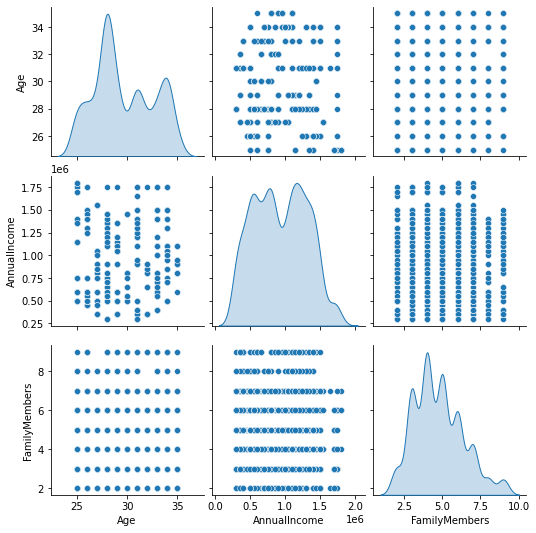

In [326]:
# Checking for numerical features' correlation
sns.pairplot(data, diag_kind = 'kde')

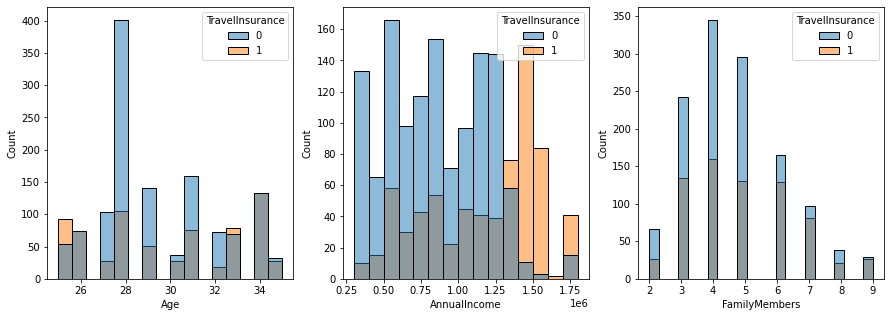

In [330]:
# Visualizing distribution of numerical features group by TravelInsurance

num_features = ['Age', 'AnnualIncome', 'FamilyMembers']

fig, ax = plt.subplots(1, 3, figsize = (15, 5))

for col in range(len(num_features)):
    sns.histplot(data = data, x = num_features[col], hue = 'TravelInsurance', ax = ax[col])

plt.show()

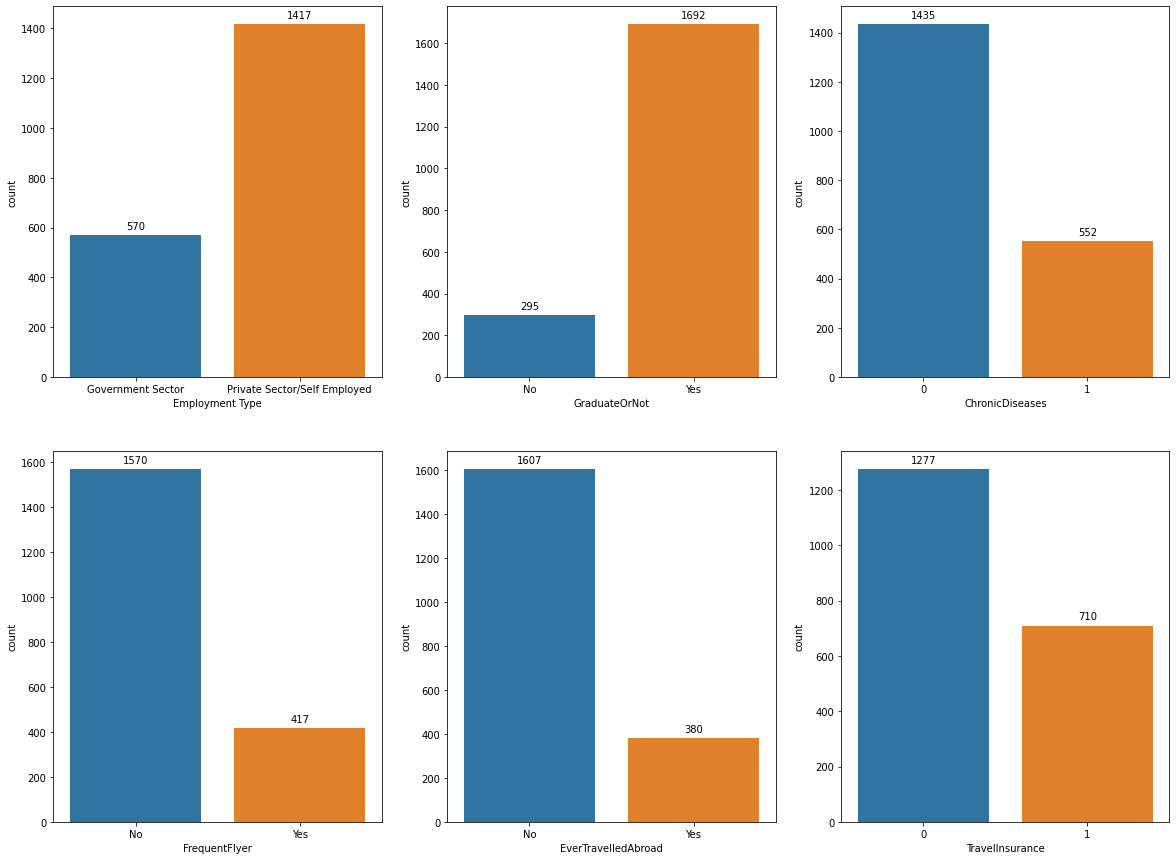

In [327]:
# Visualizing all categorical features

cate_features = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
cate_features = np.array(cate_features).reshape(2,3)

fig, ax = plt.subplots(2, 3, figsize = (20, 15))

for i in range(2):
    for j in range(3):
        cp = sns.countplot(data = data, x = data[cate_features[i][j]], ax = ax[i][j])
        for p in cp.patches:
            cp.annotate(format(p.get_height()),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = 'center', va = 'center', xytext = (0, 9),
                           textcoords = 'offset points')

plt.show()

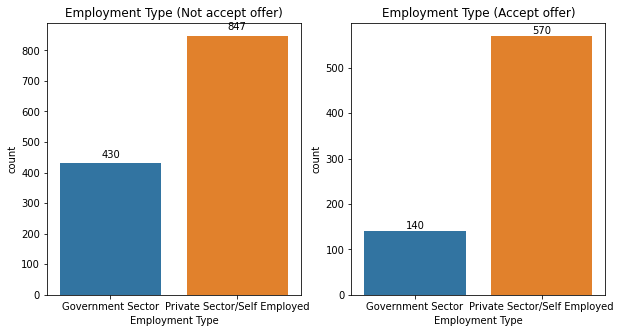

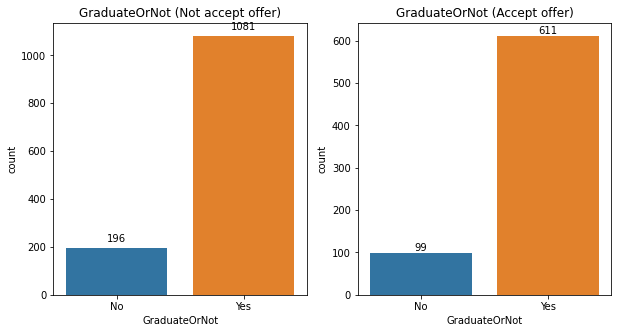

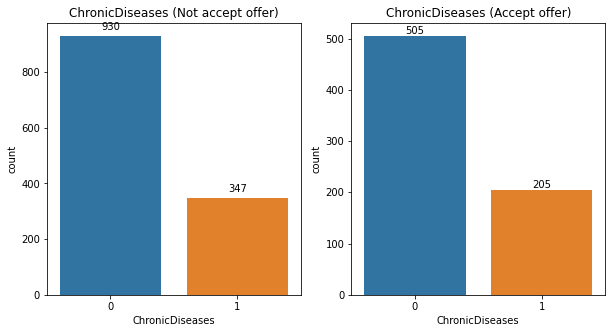

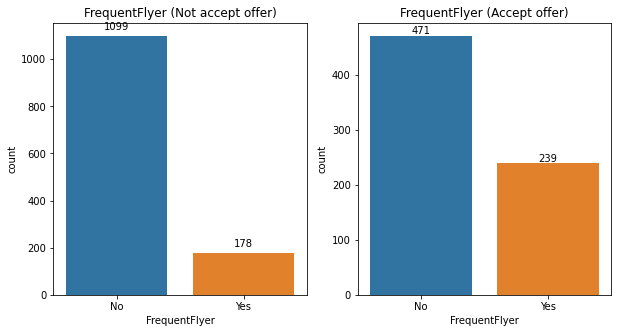

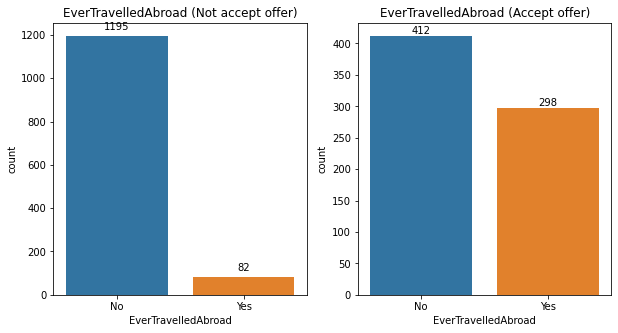

In [331]:
# Visualizing all categorical features to compare between not accept offer customer and accept offer customer

cate_features = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']

for col in cate_features:
    fig, ax = plt.subplots(1, 2, figsize = (10, 5))

    cp = sns.countplot(data = data, x = data[data['TravelInsurance'] == 0][col], ax = ax[0])
    cp.title.set_text(col + ' (Not accept offer)')
    for p in cp.patches:
        cp.annotate(format(p.get_height()),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center', xytext = (0, 9),
                        textcoords = 'offset points')

    cp = sns.countplot(data = data, x = data[data['TravelInsurance'] == 1][col], ax = ax[1])
    cp.title.set_text(col + ' (Accept offer)')
    for p in cp.patches:
        cp.annotate(format(p.get_height()),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center', xytext = (0, 5),
                        textcoords = 'offset points')
plt.show()

# **Data Modelling**

Choose basic 3 models for testing (Logistic Regression, Decision Tree, Random Forest)

In [332]:
# Import Packages for Data modelling

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [333]:
# Transform categorical features which is a text (yes/no or etc.) to binary category by label encoder

encoder = LabelEncoder()

data['Employment Type'] = encoder.fit_transform(data['Employment Type'])
data['GraduateOrNot'] = encoder.fit_transform(data['GraduateOrNot'])
data['FrequentFlyer'] = encoder.fit_transform(data['FrequentFlyer'])
data['EverTravelledAbroad'] = encoder.fit_transform(data['EverTravelledAbroad'])

In [334]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [335]:
# Split into features and respondent

x = data.drop('TravelInsurance', axis = 1) # features
y = data['TravelInsurance'] # respondent

In [336]:
# Split into training model and prediction test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 845)

In [337]:
# Features Standardize

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

k = 5 # k value for determine the number of fold in cross validation

In [338]:
# Hyperparameter tuning and create model for Logistic Regression Model

lr = LogisticRegression()

params = {
    'solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
    'C' : [0.01, 1, 100]
}

cv_lr = GridSearchCV(lr, params, cv = k)

In [339]:
# Hyperparameter tuning and create model for Decision Tree Model

dt = DecisionTreeClassifier()

params = {
    'max_depth' : list(range(2, 11)),
    'max_features' : ['auto', 'sqrt', 'log2']
}

cv_dt = GridSearchCV(dt, params, cv = k)

In [340]:
# Hyperparameter tuning and create model for Random Forest Model

rf = RandomForestClassifier()

params = {
    'n_estimators' : [10, 20, 50, 100],
    'max_depth' : list(range(2, 11)),
    'max_features' : ['auto', 'sqrt', 'log2']
}

cv_rf = GridSearchCV(rf, params, cv = k)

In [341]:
# Fitting model with training set by best parameters in each models from hyperparameter tuning

cv_lr.fit(x_train, y_train)
cv_dt.fit(x_train, y_train)
cv_rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [342]:
# Best parameter of each model

print(cv_lr.best_params_)
print(cv_dt.best_params_)
print(cv_rf.best_params_)

{'C': 1, 'solver': 'lbfgs'}
{'max_depth': 4, 'max_features': 'log2'}
{'max_depth': 6, 'max_features': 'log2', 'n_estimators': 100}


In [343]:
# Predict by independent variable of test set

y_lr = cv_lr.predict(x_test)
y_dt = cv_dt.predict(x_test)
y_rf = cv_rf.predict(x_test)

In [344]:
# Data Evaluation conclusion based on accuracy score

print('\t\tAccuracy Score')
print('Logistic Regression   : ', round(accuracy_score(y_lr, y_test) * 100, 5), '%')
print('Decision Tree           : ', round(accuracy_score(y_dt, y_test) * 100, 5), '%')
print('Random Forest         : ', round(accuracy_score(y_rf, y_test) * 100, 5), '%')

		Accuracy Score
Logistic Regression   :  72.86432 %
Decision Tree           :  76.13065 %
Random Forest         :  81.15578 %


# **Conclusion**

> According to EDA part. Firstly, separate customer for 2 groups by customer who appected and declined the travel insurance offer.

1.   The high yearly income customer tend to accept the travel insurance offer on the other hand the customer who have low yearly income they decline the travel insurance offer.

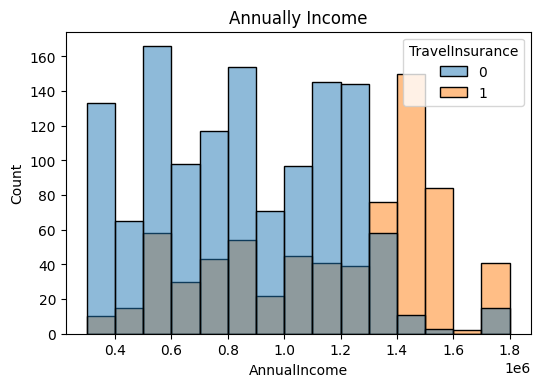

In [345]:
#@title
plt.figure(dpi = 100)
ax = sns.histplot(data = data, x = 'AnnualIncome', hue = 'TravelInsurance')
ax.title.set_text('Annually Income')
plt.show()

2.   Customer who working in government sector they tend to decline the offer.

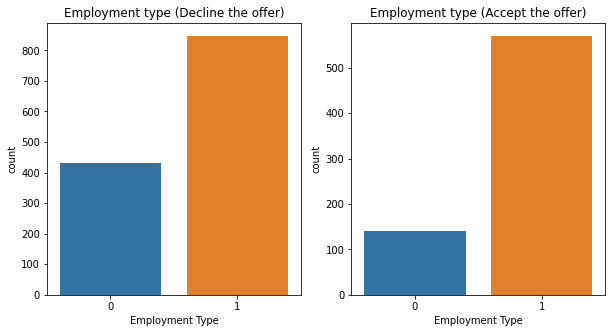

In [346]:
#@title
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
cp = sns.countplot(data = data, x = data[data['TravelInsurance'] == 0]['Employment Type'], ax = ax[0])
cp.title.set_text('Employment type (Decline the offer)')
cp = sns.countplot(data = data, x = data[data['TravelInsurance'] == 1]['Employment Type'], ax = ax[1])
cp.title.set_text('Employment type (Accept the offer)')
plt.show()

3.   Almost customer in declined travel insurance offer group they aren't frequent flyer in last 2 years and not ever travelled abroad.

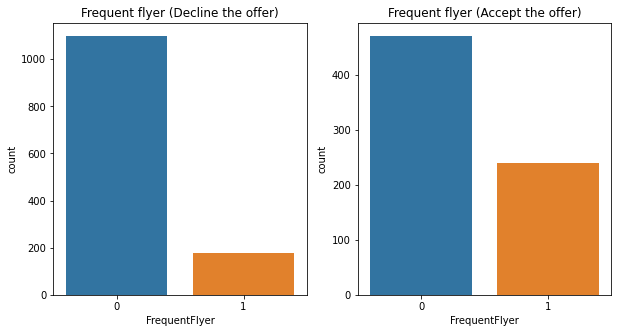

In [347]:
#@title
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
cp = sns.countplot(data = data, x = data[data['TravelInsurance'] == 0]['FrequentFlyer'], ax = ax[0])
cp.title.set_text('Frequent flyer (Decline the offer)')
cp = sns.countplot(data = data, x = data[data['TravelInsurance'] == 1]['FrequentFlyer'], ax = ax[1])
cp.title.set_text('Frequent flyer (Accept the offer)')
plt.show()

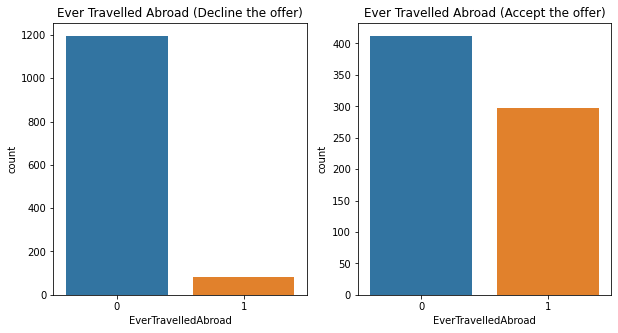

In [348]:
#@title
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
cp = sns.countplot(data = data, x = data[data['TravelInsurance'] == 0]['EverTravelledAbroad'], ax = ax[0])
cp.title.set_text('Ever Travelled Abroad (Decline the offer)')
cp = sns.countplot(data = data, x = data[data['TravelInsurance'] == 1]['EverTravelledAbroad'], ax = ax[1])
cp.title.set_text('Ever Travelled Abroad (Accept the offer)')
plt.show()

4.   Customer's age in range between 27 and 31 they declined the offer.

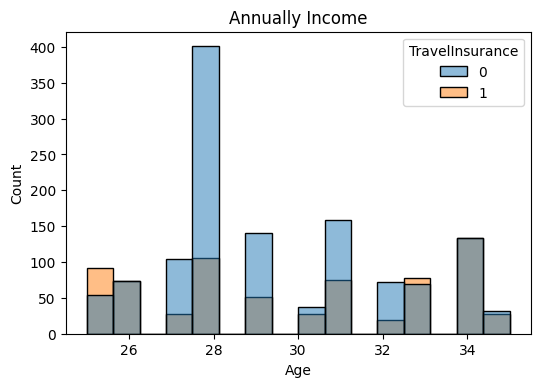

In [349]:
#@title
plt.figure(dpi = 100)
ax = sns.histplot(data = data, x = 'Age', hue = 'TravelInsurance')
ax.title.set_text('Annually Income')
plt.show()

> From Data modelling process, the best of predict model achieved 81.16% by using ***Random Forest***

> The insight give which group of customer who accept and decline the travel insurance offer. So, the insurance producer should consider why the customer decline their product and who are they should sell for properly customer. After that, they could design new insurance product and offer to more customer who accpet the offer.